In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()
pd.set_option('max_column', None)
pd.set_option('max_row', None)


In [2]:
train = pd.read_csv('train_Wc8LBpr.csv')
test = pd.read_csv('test_VsU9xXK.csv')
sample = pd.read_csv('sample_submission_NoPBkjr.csv')

from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [4]:
train.shape, test.shape

((131662, 14), (87395, 13))

In [5]:
train.isnull().sum() * 100 / len(train)

Trip_ID                         0.000000
Trip_Distance                   0.000000
Type_of_Cab                    15.349911
Customer_Since_Months           4.496362
Life_Style_Index               15.336999
Confidence_Life_Style_Index    15.336999
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           53.948748
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
Surge_Pricing_Type              0.000000
dtype: float64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [7]:
target = 'Surge_Pricing_Type'
trip_ID = test['Trip_ID']
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [8]:
train.describe(include='O')

,Trip_ID,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
count,131662,111452,111469,131662,131662
unique,131662,5,3,14,2
top,T0005733271,B,B,A,Male
freq,1,31136,40355,77597,93900


In [9]:
train[target] = train[target].astype('int')

In [10]:
train[target].value_counts(normalize=True)*100

2    43.086084
3    36.244323
1    20.669593
Name: Surge_Pricing_Type, dtype: float64

In [11]:

# join test to train
df = train.append(test, ignore_index=True)
df.shape

(219057, 14)

In [12]:
df.drop('Trip_ID', axis=1, inplace=True)

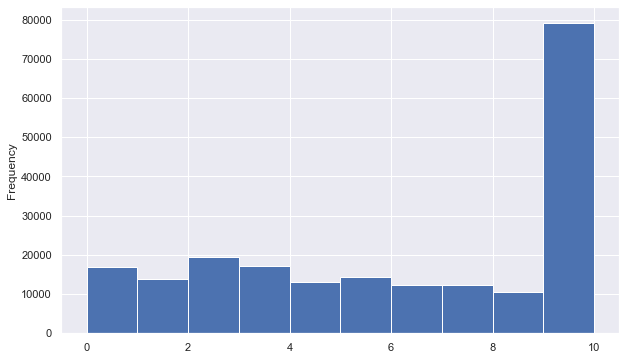

In [13]:
df['Customer_Since_Months'].plot(kind='hist', figsize=(10,6))

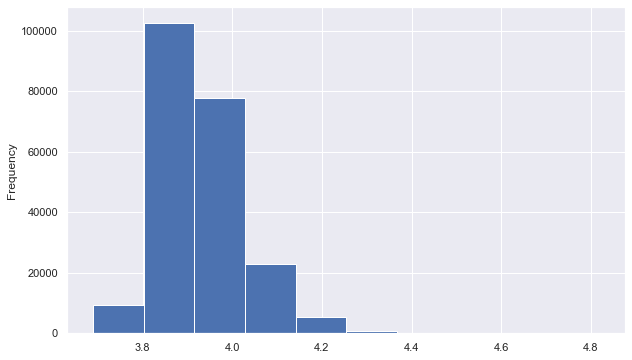

In [14]:
np.log(df['Var2']).plot(kind='hist', figsize=(10,6))

In [15]:
df['Customer_Since_Months'] = df['Customer_Since_Months'].fillna(-1)
df['Life_Style_Index'] = df['Life_Style_Index'].fillna(-1)
df['Confidence_Life_Style_Index'] = df['Confidence_Life_Style_Index'].fillna(-1)
df['Type_of_Cab'] = df['Type_of_Cab'].fillna(-1)
df['var3_by_Life_Style_Index'] = df['Var3'] / df['Life_Style_Index']
df['var3_by_Custromer_Rating'] = df['Var3'] / df['Customer_Rating']
df['log_Var2'] = np.log(df['Var2'])
df['trip_Distance_by_Customer_Rating'] = df['Trip_Distance'] / df['Customer_Rating']

In [16]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
lb = LabelBinarizer()
le = LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])
df['Customer_Since_Months'] = le.fit_transform(df['Customer_Since_Months'])
df['Cancellation_Last_1Month'] = lb.fit_transform(df['Cancellation_Last_1Month'])

In [17]:
df_dummy = pd.get_dummies(data=df, columns=['Type_of_Cab', 'Confidence_Life_Style_Index',
                                                'Destination_Type',])

df_dummy.shape

(219057, 38)

In [15]:
df_dummy.isnull().sum()

Trip_Distance                            0
Customer_Since_Months                    0
Life_Style_Index                         0
Customer_Rating                          0
Cancellation_Last_1Month                 0
Var1                                117819
Var2                                     0
Var3                                     0
Gender                                   0
Surge_Pricing_Type                   87395
var3_by_Life_Style_Index                 0
var3_by_Custromer_Rating                 0
log_Var2                                 0
trip_Distance_by_Customer_Rating         0
Type_of_Cab_-1                           0
Type_of_Cab_A                            0
Type_of_Cab_B                            0
Type_of_Cab_C                            0
Type_of_Cab_D                            0
Type_of_Cab_E                            0
Confidence_Life_Style_Index_-1           0
Confidence_Life_Style_Index_A            0
Confidence_Life_Style_Index_B            0
Confidence_

In [18]:
df_dummy.drop('Var1',axis=1, inplace=True)

In [19]:
train_df = df_dummy[df_dummy[target].notnull() == True]
test_df = df_dummy[df_dummy[target].notnull() == False]

train_df.shape, test_df.shape

((131662, 37), (87395, 37))

In [35]:
cat_features = ['Trip_Distance', 'Life_Style_Index', 'Customer_Rating', 'Cancellation_Last_1Month',
               'Var3', 'trip_Distance_by_Customer_Rating', 'Type_of_Cab_-1','Type_of_Cab_A',
               'Type_of_Cab_B','Type_of_Cab_C','Type_of_Cab_D','Type_of_Cab_D','Type_of_Cab_E',
               'Confidence_Life_Style_Index_A', 'Confidence_Life_Style_Index_B', 'Destination_Type_B']

In [20]:
test_df.drop(target, axis=1, inplace=True)

In [21]:
X = train_df.drop(target,axis=1)
y = train_df[target]
# test_cat_features = test_df[cat_features]

In [22]:
# scale
mm = MinMaxScaler()
X = mm.fit_transform(X)
test_v = mm.transform(test_df)

X

array([[0.05930959, 0.18181818, 0.58342567, ..., 0.        , 0.        ,
        0.        ],
       [0.26771943, 1.        , 0.64380922, ..., 0.        , 0.        ,
        0.        ],
       [0.37890195, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.36595667, 1.        , 0.6800979 , ..., 0.        , 0.        ,
        0.        ],
       [0.42756151, 0.45454545, 0.68891306, ..., 0.        , 0.        ,
        0.        ],
       [0.29058024, 0.72727273, 0.67023937, ..., 0.        , 0.        ,
        0.        ]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2020, stratify=y)


In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

### 5 fold Cross Validation

In [37]:
param = {
    'baggin_freq' : 5,
    'bagging_fraction': 0.5,
    'boost': 'gbdt',
    'feature_fraction': 0.7,
    'learning_rate': 0.005,
    'num_class': 4,
    'metric': 'multi_logloss',
    'max_depth': 8,
    'num_leaves': 70,
    'min_data_in_leaf': 40,
    'objective': 'multiclass',
    'scale_pos_weight': 1,
    'verbosity': '1'
#     'device': 'gpu'
}

In [28]:
np.zeros((5, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [31]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.059310,0.181818,0.583426,0.780945,1.0,0.071429,0.051948,0.0,0.755315,0.000061,0.123530,0.000022,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.267719,1.000000,0.643809,0.689922,1.0,0.190476,0.168831,1.0,0.770347,0.000151,0.297394,0.000114,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.378902,1.000000,0.000000,0.700175,0.0,0.190476,0.162338,1.0,0.294488,0.000143,0.297394,0.000160,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.562339,1.000000,0.000000,0.690673,1.0,0.142857,0.142857,1.0,0.308079,0.000136,0.231893,0.000241,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.501653,1.000000,0.686716,0.680420,0.0,0.107143,0.324675,1.0,0.795629,0.000242,0.179371,0.000218,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1022)
predictions = np.zeros((len(test_v), 4))
feature_importance_df = pd.DataFrame()


for fold_, (trn_idx, val_idx) in enumerate(folds.split(X.values, y.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(X.iloc[trn_idx], label=y.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[val_idx], label=y.iloc[val_idx])
    
    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets=[trn_data, val_data], verbose_eval=700, 
                   early_stopping_rounds=300)
    predictions_val = np.argmax(clf.predict(X.iloc[val_idx], num_iteration=clf.best_iteration), axis=1)
    
    print('CV Score: {:<8.5f}'.format(accuracy_score(predictions_val, y.iloc[val_idx])))
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df['Feature'] = train_df.drop(target,axis=1).columns
    fold_importance_df['importance'] = clf.feature_importance()
    fold_importance_df['fold'] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_v, num_iteration=clf.best_iteration) / folds.n_splits

Fold 0
Training until validation scores don't improve for 300 rounds
[700]	training's multi_logloss: 0.706693	valid_1's multi_logloss: 0.723534
[1400]	training's multi_logloss: 0.677204	valid_1's multi_logloss: 0.709799
[2100]	training's multi_logloss: 0.66024	valid_1's multi_logloss: 0.707744
Early stopping, best iteration is:
[2476]	training's multi_logloss: 0.652304	valid_1's multi_logloss: 0.707497
CV Score: 0.69981 
Fold 1
Training until validation scores don't improve for 300 rounds
[700]	training's multi_logloss: 0.708234	valid_1's multi_logloss: 0.717759
[1400]	training's multi_logloss: 0.678721	valid_1's multi_logloss: 0.703842
[2100]	training's multi_logloss: 0.661296	valid_1's multi_logloss: 0.701539
Early stopping, best iteration is:
[2497]	training's multi_logloss: 0.652666	valid_1's multi_logloss: 0.701427
CV Score: 0.70497 
Fold 2
Training until validation scores don't improve for 300 rounds
[700]	training's multi_logloss: 0.70499	valid_1's multi_logloss: 0.728942
[1400]

In [34]:
folds.n_splits

5

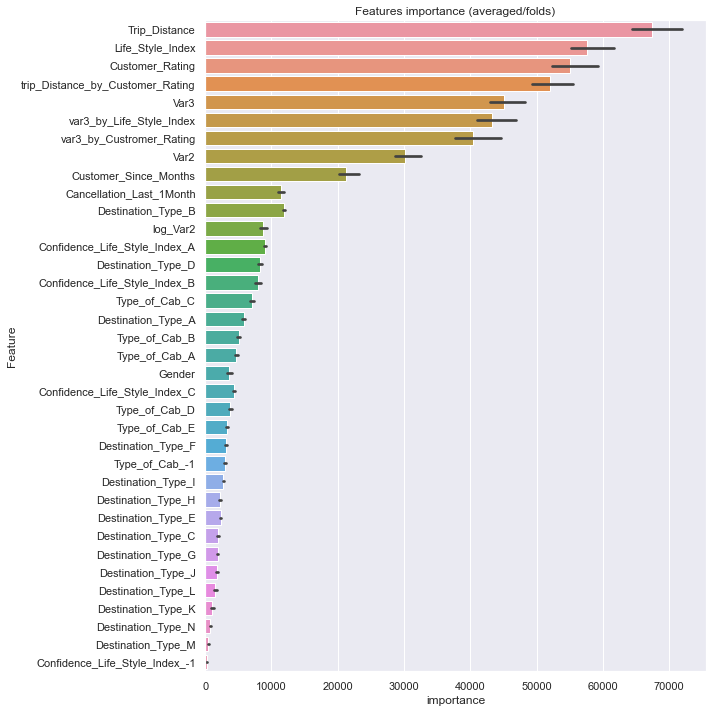

In [40]:
cols = (feature_importance_df[['Feature', 'importance']]\
        .groupby('Feature').mean().sort_values(by='importance', ascending=False)[:150].index)

best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(10,10))
sns.barplot(x='importance', y='Feature', data=best_features.sort_values(by='importance', ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('FI.png')

In [41]:
predicition_test = np.argmax(predictions, axis=1)

In [42]:
predicition_test[:10]

array([1, 2, 2, 2, 2, 3, 3, 2, 2, 3], dtype=int64)

In [24]:
x_train_meta = np.zeros((X_train.shape[0], X.shape[1] + 5))
x_train_meta[:, :-5] = X_train
x_train_meta[:, -5:] = -1
print(x_train_meta)

[[ 0.69032317  1.          0.73514028 ... -1.         -1.
  -1.        ]
 [ 0.21098054  0.36363636  0.62493468 ... -1.         -1.
  -1.        ]
 [ 0.30370914  0.72727273  0.69854011 ... -1.         -1.
  -1.        ]
 ...
 [ 0.62926919  1.          0.         ... -1.         -1.
  -1.        ]
 [ 0.21878443  1.          0.62046838 ... -1.         -1.
  -1.        ]
 [ 0.19610723  0.27272727  0.61307958 ... -1.         -1.
  -1.        ]]


In [30]:
train_mae_values, val_mae_values = {}, {}

In [32]:
# Multinomial

nb = MultinomialNB(alpha=0.1)

nb.fit(X_train, y_train)
nb_preds_train = nb.predict(X_train)
nb_preds_val = nb.predict(X_test)

train_mae_values['nb'] = accuracy_score(y_true=y_train, y_pred=nb_preds_train)
val_mae_values['nb'] = accuracy_score(y_true=y_test, y_pred=nb_preds_val)

In [33]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
rf_preds_train = rf.predict(X_train)
rf_preds_val = rf.predict(X_test)

train_mae_values['rf'] = accuracy_score(y_true=y_train, y_pred=rf_preds_train)
val_mae_values['rf'] = accuracy_score(y_true=y_test, y_pred=rf_preds_val)

In [34]:
grb = GradientBoostingClassifier()

grb.fit(X_train, y_train)
grb_preds_train = grb.predict(X_train)
grb_preds_val = grb.predict(X_test)

train_mae_values['grb'] = accuracy_score(y_true=y_train, y_pred=grb_preds_train)
val_mae_values['grb'] = accuracy_score(y_true=y_test, y_pred=grb_preds_val)

In [35]:
lgbm = LGBMClassifier()

lgbm.fit(X_train, y_train)
lgbm_preds_train = lgbm.predict(X_train)
lgbm_preds_val = lgbm.predict(X_test)

train_mae_values['lgbm'] = accuracy_score(y_true=y_train, y_pred=lgbm_preds_train)
val_mae_values['lgbm'] = accuracy_score(y_true=y_test, y_pred=lgbm_preds_val)

In [36]:
# Stacked Model

num_base_predictors = len(train_mae_values) # 4

x_train_with_metapreds = np.zeros((X_train.shape[0], X_train.shape[1]+num_base_predictors))
x_train_with_metapreds[:, :-num_base_predictors] = X_train
x_train_with_metapreds[:, -num_base_predictors:] = -1

In [38]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=222001)

for train_idx, test_idx in kf.split(X_train):
    kf_x_train, kf_x_test = X_train[train_idx], X_train[test_idx]
    kf_y_train, kf_y_test = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    predictions = []
    
    nb = MultinomialNB()
    nb.fit(kf_x_train, kf_y_train)
    predictions.append(nb.predict(kf_x_test))
    
    rf = RandomForestClassifier()
    rf.fit(kf_x_train, kf_y_train)
    predictions.append(rf.predict(kf_x_test))
    
    grb = GradientBoostingClassifier()
    grb.fit(kf_x_train, kf_y_train)
    predictions.append(grb.predict(kf_x_test))
    
    lgbm = LGBMClassifier()
    lgbm.fit(kf_x_train, kf_y_train)
    predictions.append(lgbm.predict(kf_x_test))
    
    for i, preds in enumerate(predictions):
        x_train_with_metapreds[test_idx, -(i+1)] = preds

In [39]:
x_val_with_metapreds = np.zeros((X_test.shape[0], X_test.shape[1]+num_base_predictors))
x_val_with_metapreds[:, :-num_base_predictors] = X_test
x_val_with_metapreds[:, -num_base_predictors:] = -1

In [43]:
predictions = []

nb = MultinomialNB()
nb.fit(X_train, y_train)
predictions.append(nb.predict(X_test))

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions.append(rf.predict(X_test))

grb = GradientBoostingClassifier()
grb.fit(X_train, y_train)
predictions.append(grb.predict(X_test))

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
predictions.append(lgbm.predict(X_test))

for i, preds in enumerate(predictions):
    x_val_with_metapreds[:, -(i+1)] = preds

In [48]:
cats_stack = CatBoostClassifier(verbose=False, learning_rate=0.01)
cats_stack.fit(x_train_with_metapreds, y_train)
cats_pred_val = cats_stack.predict(x_val_with_metapreds)
cats_pred_train = cats_stack.predict(x_train_with_metapreds)

train_mae_values['cats'] = accuracy_score(y_true=y_train, y_pred=cats_pred_train)
val_mae_values['cats'] = accuracy_score(y_true=y_test, y_pred=cats_pred_val)

In [49]:
acc_score = pd.concat([pd.Series(train_mae_values, name='train'), 
                      pd.Series(val_mae_values, name='test')], axis=1)

acc_score

,train,test
nb,0.681265,0.682338
rf,0.999991,0.688869
grb,0.698829,0.697452
lgbm,0.708096,0.699730
cats,0.700510,0.699958


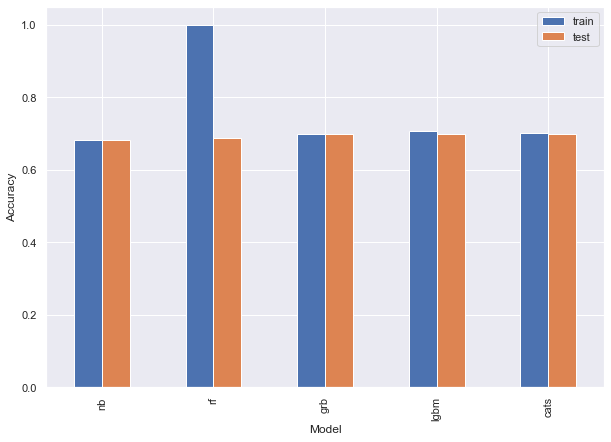

In [50]:
acc_score.plot(kind='bar', figsize=(10,7))
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [29]:
kf = KFold(n_splits=5, random_state=2200)

for train_idx, test_idx in kf.split(X_train):
    kf_X_train, kf_X_test = X_train[train_idx], X_train[test_idx]
    kf_y_train, kf_y_test = y_train.iloc[train_idx], y_test.iloc[test_idx]
    
#     algorithms
    rf = RandomForestClassifier()
    rf.fit(kf_X_train, kf_y_train)
    rf_pred = rf.predict(kf_X_test)
    # naive bayes
    nb = MultinomialNB(alpha=0.1)
    nb.fit(kf_X_train, kf_y_train)
    nb_pred = nb.predict(kf_X_test)
    # gradient boosting classifer
    gbr = GradientBoostingClassifier()
    gbr.fit(kf_X_train, kf_y_train)
    gbr_pred = gbr.predict(kf_X_test)
    # logisticRegression
    lr = LogisticRegression(C=0.3)
    lr.fit(kf_X_train, kf_y_train)
    lr_pred = lr.predict(kf_X_test)
    # LGBM
    lgbm = LGBMClassifier(alpha=0.1)
    lgbm.fit(kf_X_train, kf_y_train)
    lgbm_pred = lgbm.predict(kf_X_test)
    
    # build the stack prediction
    x_train_meta[test_idx, -5] = rf_pred
    x_train_meta[test_idx, -4] = nb_pred    
    x_train_meta[test_idx, -3] = gbr_pred    
    x_train_meta[test_idx, -2] = lr_pred    
    x_train_meta[test_idx, -1] = lgbm_pred    

IndexError: positional indexers are out-of-bounds

In [ ]:
# Create a new Validation set
x_test_meta = np.zeros((X_test.shape[0], X_test.shape[1]+5))
x_test_meta[:, :-5] = 

In [41]:
rf = RandomForestClassifier( n_estimators=350)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.682299775946531

0.6906543120798997

In [23]:
grb = GradientBoostingClassifier()
grb.fit(X_train, y_train)
y_pred = grb.predict(X_test)
accuracy_score(y_test, y_pred)

0.6974518664793226

In [40]:
from sklearn.model_selection import cross_val_score, cross_val_predict
score = cross_val_score(grb, X, y, cv=5, scoring='accuracy').mean()

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0.1)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test, y_pred)

0.6823377511107735

In [31]:
# testing new models
clf = XGBClassifier(base_score=0.7,booster="gbtree",n_estimators=500, objective='binary:logistic',
                    max_depth=3,learning_rate=0.01,subsample=0.8)
eval_set  = [(X_train,y_train), (X_test,y_test)]
#.900057
clf.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=100, verbose=50)

[0]	validation_0-merror:0.328257	validation_1-merror:0.325827
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[50]	validation_0-merror:0.326434	validation_1-merror:0.324308
[100]	validation_0-merror:0.325941	validation_1-merror:0.323321
[150]	validation_0-merror:0.322219	validation_1-merror:0.320434
[200]	validation_0-merror:0.31844	validation_1-merror:0.316865
[250]	validation_0-merror:0.314272	validation_1-merror:0.312042
[300]	validation_0-merror:0.313257	validation_1-merror:0.311814
[350]	validation_0-merror:0.312307	validation_1-merror:0.31132
[400]	validation_0-merror:0.31095	validation_1-merror:0.310637
[450]	validation_0-merror:0.309867	validation_1-merror:0.309763
[499]	validation_0-merror:0.309411	validation_1-merror:0.308928


XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [42]:

eval_dataset = Pool(X_test, y_test)

cats_model = CatBoostClassifier(learning_rate=0.01,eval_metric='Accuracy',depth=7, iterations=3000)

cats_model.fit(X_train, y_train, eval_set=eval_dataset, verbose=100, early_stopping_rounds=100)

0:	learn: 0.6775342	test: 0.6807048	best: 0.6807048 (0)	total: 174ms	remaining: 8m 41s
100:	learn: 0.6846073	test: 0.6868948	best: 0.6870467 (98)	total: 10.8s	remaining: 5m 10s
200:	learn: 0.6882720	test: 0.6905404	best: 0.6905404 (200)	total: 21.1s	remaining: 4m 53s
300:	learn: 0.6910917	test: 0.6926670	best: 0.6927050 (299)	total: 31.2s	remaining: 4m 39s
400:	learn: 0.6934273	test: 0.6955151	best: 0.6956670 (398)	total: 41.1s	remaining: 4m 26s
500:	learn: 0.6945950	test: 0.6957050	best: 0.6962746 (460)	total: 51s	remaining: 4m 14s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6962746364
bestIteration = 460

Shrink model to first 461 iterations.


In [33]:
y_train_pred = cats_model.predict(X_train)
# how did our model perform on the train set?
count_misclassified = (y_train != y_train_pred).count()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_train_pred, y_train)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 105329
Accuracy: 0.70


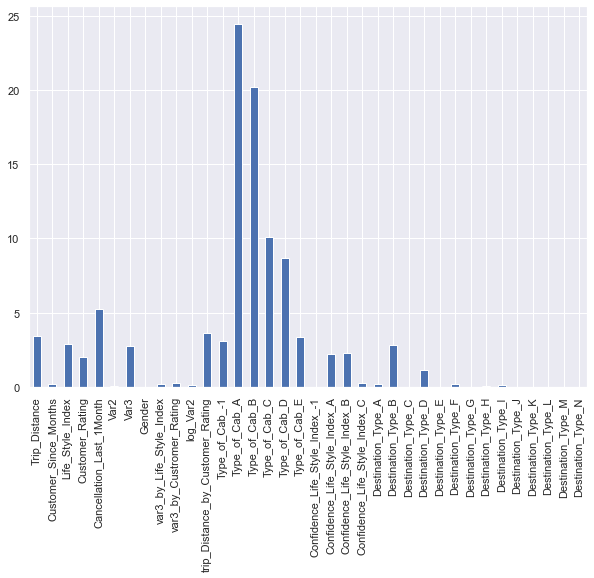

In [34]:
pd.Series(cats_model.feature_importances_, index=train_df.drop(target, axis=1).columns).plot(kind='bar',
                                                                                             figsize=(10,7))

In [43]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(boosting_type="dart")

lgbm.fit(X_train, y_train,eval_set=[(X_test, y_test)],
         early_stopping_rounds=100, verbose=20)

[20]	valid_0's multi_logloss: 0.759954
[40]	valid_0's multi_logloss: 0.731014
[60]	valid_0's multi_logloss: 0.731171
[80]	valid_0's multi_logloss: 0.726085
[100]	valid_0's multi_logloss: 0.726239


LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

array([1.03943368e-15, 1.39006020e-01, 4.85951307e-01, 3.75042673e-01])

In [50]:
cats_model.fit(X, y)

0:	learn: 0.6790038	total: 182ms	remaining: 9m 6s
1:	learn: 0.6803026	total: 331ms	remaining: 8m 15s
2:	learn: 0.6823685	total: 491ms	remaining: 8m 10s
3:	learn: 0.6822318	total: 635ms	remaining: 7m 55s
4:	learn: 0.6827558	total: 809ms	remaining: 8m 4s
5:	learn: 0.6829837	total: 992ms	remaining: 8m 14s
6:	learn: 0.6834014	total: 1.15s	remaining: 8m 13s
7:	learn: 0.6821254	total: 1.29s	remaining: 8m 1s
8:	learn: 0.6822394	total: 1.42s	remaining: 7m 51s
9:	learn: 0.6824444	total: 1.56s	remaining: 7m 47s
10:	learn: 0.6827862	total: 1.7s	remaining: 7m 41s
11:	learn: 0.6827179	total: 1.84s	remaining: 7m 39s
12:	learn: 0.6833862	total: 1.99s	remaining: 7m 37s
13:	learn: 0.6833483	total: 2.13s	remaining: 7m 35s
14:	learn: 0.6835989	total: 2.28s	remaining: 7m 33s
15:	learn: 0.6834926	total: 2.42s	remaining: 7m 32s
16:	learn: 0.6834014	total: 2.55s	remaining: 7m 27s
17:	learn: 0.6835837	total: 2.69s	remaining: 7m 25s
18:	learn: 0.6834926	total: 2.82s	remaining: 7m 22s
19:	learn: 0.6836597	total

159:	learn: 0.6870851	total: 22.4s	remaining: 6m 36s
160:	learn: 0.6870623	total: 22.5s	remaining: 6m 36s
161:	learn: 0.6871459	total: 22.6s	remaining: 6m 36s
162:	learn: 0.6872598	total: 22.8s	remaining: 6m 36s
163:	learn: 0.6872294	total: 22.9s	remaining: 6m 36s
164:	learn: 0.6873054	total: 23s	remaining: 6m 35s
165:	learn: 0.6872902	total: 23.2s	remaining: 6m 35s
166:	learn: 0.6873433	total: 23.3s	remaining: 6m 35s
167:	learn: 0.6873661	total: 23.4s	remaining: 6m 35s
168:	learn: 0.6874269	total: 23.6s	remaining: 6m 35s
169:	learn: 0.6874649	total: 23.7s	remaining: 6m 34s
170:	learn: 0.6875332	total: 23.9s	remaining: 6m 34s
171:	learn: 0.6875028	total: 24s	remaining: 6m 34s
172:	learn: 0.6875788	total: 24.1s	remaining: 6m 34s
173:	learn: 0.6876320	total: 24.3s	remaining: 6m 34s
174:	learn: 0.6876699	total: 24.4s	remaining: 6m 33s
175:	learn: 0.6877155	total: 24.5s	remaining: 6m 33s
176:	learn: 0.6877231	total: 24.7s	remaining: 6m 33s
177:	learn: 0.6876927	total: 24.8s	remaining: 6m 3

315:	learn: 0.6916802	total: 43.4s	remaining: 6m 8s
316:	learn: 0.6917410	total: 43.5s	remaining: 6m 8s
317:	learn: 0.6917486	total: 43.6s	remaining: 6m 8s
318:	learn: 0.6917258	total: 43.8s	remaining: 6m 7s
319:	learn: 0.6918093	total: 43.9s	remaining: 6m 7s
320:	learn: 0.6918169	total: 44s	remaining: 6m 7s
321:	learn: 0.6918853	total: 44.2s	remaining: 6m 7s
322:	learn: 0.6919309	total: 44.3s	remaining: 6m 7s
323:	learn: 0.6919460	total: 44.4s	remaining: 6m 7s
324:	learn: 0.6920676	total: 44.6s	remaining: 6m 6s
325:	learn: 0.6920676	total: 44.7s	remaining: 6m 6s
326:	learn: 0.6920524	total: 44.9s	remaining: 6m 6s
327:	learn: 0.6920448	total: 45s	remaining: 6m 6s
328:	learn: 0.6920600	total: 45.1s	remaining: 6m 6s
329:	learn: 0.6920524	total: 45.3s	remaining: 6m 6s
330:	learn: 0.6920220	total: 45.4s	remaining: 6m 6s
331:	learn: 0.6920904	total: 45.5s	remaining: 6m 5s
332:	learn: 0.6920676	total: 45.7s	remaining: 6m 5s
333:	learn: 0.6920752	total: 45.8s	remaining: 6m 5s
334:	learn: 0.69

473:	learn: 0.6948322	total: 1m 4s	remaining: 5m 42s
474:	learn: 0.6948702	total: 1m 4s	remaining: 5m 42s
475:	learn: 0.6949461	total: 1m 4s	remaining: 5m 42s
476:	learn: 0.6949841	total: 1m 4s	remaining: 5m 41s
477:	learn: 0.6949841	total: 1m 4s	remaining: 5m 41s
478:	learn: 0.6950069	total: 1m 4s	remaining: 5m 41s
479:	learn: 0.6949765	total: 1m 5s	remaining: 5m 41s
480:	learn: 0.6949613	total: 1m 5s	remaining: 5m 41s
481:	learn: 0.6950373	total: 1m 5s	remaining: 5m 41s
482:	learn: 0.6950449	total: 1m 5s	remaining: 5m 40s
483:	learn: 0.6950525	total: 1m 5s	remaining: 5m 40s
484:	learn: 0.6950297	total: 1m 5s	remaining: 5m 40s
485:	learn: 0.6950373	total: 1m 5s	remaining: 5m 40s
486:	learn: 0.6950829	total: 1m 5s	remaining: 5m 40s
487:	learn: 0.6951360	total: 1m 6s	remaining: 5m 40s
488:	learn: 0.6951208	total: 1m 6s	remaining: 5m 40s
489:	learn: 0.6950981	total: 1m 6s	remaining: 5m 39s
490:	learn: 0.6951056	total: 1m 6s	remaining: 5m 39s
491:	learn: 0.6951588	total: 1m 6s	remaining: 

626:	learn: 0.6959791	total: 1m 27s	remaining: 5m 31s
627:	learn: 0.6960019	total: 1m 27s	remaining: 5m 31s
628:	learn: 0.6959943	total: 1m 27s	remaining: 5m 31s
629:	learn: 0.6960247	total: 1m 27s	remaining: 5m 30s
630:	learn: 0.6960475	total: 1m 28s	remaining: 5m 30s
631:	learn: 0.6960247	total: 1m 28s	remaining: 5m 30s
632:	learn: 0.6960399	total: 1m 28s	remaining: 5m 30s
633:	learn: 0.6960551	total: 1m 28s	remaining: 5m 30s
634:	learn: 0.6961006	total: 1m 28s	remaining: 5m 30s
635:	learn: 0.6960930	total: 1m 28s	remaining: 5m 30s
636:	learn: 0.6960551	total: 1m 28s	remaining: 5m 30s
637:	learn: 0.6960702	total: 1m 29s	remaining: 5m 29s
638:	learn: 0.6960475	total: 1m 29s	remaining: 5m 29s
639:	learn: 0.6960626	total: 1m 29s	remaining: 5m 29s
640:	learn: 0.6960323	total: 1m 29s	remaining: 5m 29s
641:	learn: 0.6960551	total: 1m 29s	remaining: 5m 29s
642:	learn: 0.6960247	total: 1m 29s	remaining: 5m 29s
643:	learn: 0.6960475	total: 1m 29s	remaining: 5m 29s
644:	learn: 0.6960930	total:

778:	learn: 0.6971867	total: 1m 49s	remaining: 5m 13s
779:	learn: 0.6971943	total: 1m 50s	remaining: 5m 13s
780:	learn: 0.6971715	total: 1m 50s	remaining: 5m 13s
781:	learn: 0.6971715	total: 1m 50s	remaining: 5m 12s
782:	learn: 0.6972019	total: 1m 50s	remaining: 5m 12s
783:	learn: 0.6972019	total: 1m 50s	remaining: 5m 12s
784:	learn: 0.6971867	total: 1m 50s	remaining: 5m 12s
785:	learn: 0.6971867	total: 1m 50s	remaining: 5m 12s
786:	learn: 0.6972627	total: 1m 51s	remaining: 5m 12s
787:	learn: 0.6972627	total: 1m 51s	remaining: 5m 12s
788:	learn: 0.6972703	total: 1m 51s	remaining: 5m 11s
789:	learn: 0.6972779	total: 1m 51s	remaining: 5m 11s
790:	learn: 0.6972551	total: 1m 51s	remaining: 5m 11s
791:	learn: 0.6972931	total: 1m 51s	remaining: 5m 11s
792:	learn: 0.6973083	total: 1m 51s	remaining: 5m 11s
793:	learn: 0.6973538	total: 1m 51s	remaining: 5m 11s
794:	learn: 0.6973386	total: 1m 52s	remaining: 5m 10s
795:	learn: 0.6973386	total: 1m 52s	remaining: 5m 10s
796:	learn: 0.6973310	total:

934:	learn: 0.6984779	total: 2m 12s	remaining: 4m 52s
935:	learn: 0.6985007	total: 2m 12s	remaining: 4m 51s
936:	learn: 0.6985387	total: 2m 12s	remaining: 4m 51s
937:	learn: 0.6985691	total: 2m 12s	remaining: 4m 51s
938:	learn: 0.6985159	total: 2m 12s	remaining: 4m 51s
939:	learn: 0.6985463	total: 2m 12s	remaining: 4m 51s
940:	learn: 0.6985387	total: 2m 13s	remaining: 4m 51s
941:	learn: 0.6985463	total: 2m 13s	remaining: 4m 51s
942:	learn: 0.6985539	total: 2m 13s	remaining: 4m 51s
943:	learn: 0.6985615	total: 2m 13s	remaining: 4m 50s
944:	learn: 0.6985691	total: 2m 13s	remaining: 4m 50s
945:	learn: 0.6985994	total: 2m 13s	remaining: 4m 50s
946:	learn: 0.6986070	total: 2m 13s	remaining: 4m 50s
947:	learn: 0.6986146	total: 2m 14s	remaining: 4m 50s
948:	learn: 0.6985918	total: 2m 14s	remaining: 4m 50s
949:	learn: 0.6985994	total: 2m 14s	remaining: 4m 50s
950:	learn: 0.6986222	total: 2m 14s	remaining: 4m 49s
951:	learn: 0.6986374	total: 2m 14s	remaining: 4m 49s
952:	learn: 0.6986526	total:

1085:	learn: 0.6991919	total: 2m 32s	remaining: 4m 29s
1086:	learn: 0.6991995	total: 2m 33s	remaining: 4m 29s
1087:	learn: 0.6992450	total: 2m 33s	remaining: 4m 29s
1088:	learn: 0.6992450	total: 2m 33s	remaining: 4m 29s
1089:	learn: 0.6991843	total: 2m 33s	remaining: 4m 29s
1090:	learn: 0.6991995	total: 2m 33s	remaining: 4m 28s
1091:	learn: 0.6992298	total: 2m 33s	remaining: 4m 28s
1092:	learn: 0.6992223	total: 2m 33s	remaining: 4m 28s
1093:	learn: 0.6991843	total: 2m 34s	remaining: 4m 28s
1094:	learn: 0.6992223	total: 2m 34s	remaining: 4m 28s
1095:	learn: 0.6992830	total: 2m 34s	remaining: 4m 28s
1096:	learn: 0.6992526	total: 2m 34s	remaining: 4m 27s
1097:	learn: 0.6992982	total: 2m 34s	remaining: 4m 27s
1098:	learn: 0.6992830	total: 2m 34s	remaining: 4m 27s
1099:	learn: 0.6992526	total: 2m 34s	remaining: 4m 27s
1100:	learn: 0.6993438	total: 2m 35s	remaining: 4m 27s
1101:	learn: 0.6992830	total: 2m 35s	remaining: 4m 27s
1102:	learn: 0.6992906	total: 2m 35s	remaining: 4m 27s
1103:	lear

1235:	learn: 0.7000653	total: 2m 52s	remaining: 4m 6s
1236:	learn: 0.7000425	total: 2m 52s	remaining: 4m 6s
1237:	learn: 0.7000349	total: 2m 52s	remaining: 4m 6s
1238:	learn: 0.7000349	total: 2m 53s	remaining: 4m 6s
1239:	learn: 0.7000501	total: 2m 53s	remaining: 4m 5s
1240:	learn: 0.7000273	total: 2m 53s	remaining: 4m 5s
1241:	learn: 0.7000425	total: 2m 53s	remaining: 4m 5s
1242:	learn: 0.7000805	total: 2m 53s	remaining: 4m 5s
1243:	learn: 0.7000653	total: 2m 53s	remaining: 4m 5s
1244:	learn: 0.7000881	total: 2m 53s	remaining: 4m 5s
1245:	learn: 0.7000805	total: 2m 54s	remaining: 4m 4s
1246:	learn: 0.7001033	total: 2m 54s	remaining: 4m 4s
1247:	learn: 0.7001109	total: 2m 54s	remaining: 4m 4s
1248:	learn: 0.7000729	total: 2m 54s	remaining: 4m 4s
1249:	learn: 0.7000957	total: 2m 54s	remaining: 4m 4s
1250:	learn: 0.7000881	total: 2m 54s	remaining: 4m 4s
1251:	learn: 0.7001109	total: 2m 54s	remaining: 4m 4s
1252:	learn: 0.7000957	total: 2m 54s	remaining: 4m 3s
1253:	learn: 0.7001185	total

1387:	learn: 0.7006046	total: 3m 12s	remaining: 3m 43s
1388:	learn: 0.7005818	total: 3m 12s	remaining: 3m 43s
1389:	learn: 0.7006122	total: 3m 12s	remaining: 3m 43s
1390:	learn: 0.7005970	total: 3m 12s	remaining: 3m 43s
1391:	learn: 0.7005970	total: 3m 13s	remaining: 3m 43s
1392:	learn: 0.7005362	total: 3m 13s	remaining: 3m 42s
1393:	learn: 0.7005590	total: 3m 13s	remaining: 3m 42s
1394:	learn: 0.7005970	total: 3m 13s	remaining: 3m 42s
1395:	learn: 0.7005894	total: 3m 13s	remaining: 3m 42s
1396:	learn: 0.7006122	total: 3m 13s	remaining: 3m 42s
1397:	learn: 0.7005970	total: 3m 13s	remaining: 3m 42s
1398:	learn: 0.7006122	total: 3m 13s	remaining: 3m 41s
1399:	learn: 0.7006122	total: 3m 14s	remaining: 3m 41s
1400:	learn: 0.7006122	total: 3m 14s	remaining: 3m 41s
1401:	learn: 0.7006274	total: 3m 14s	remaining: 3m 41s
1402:	learn: 0.7006046	total: 3m 14s	remaining: 3m 41s
1403:	learn: 0.7006198	total: 3m 14s	remaining: 3m 41s
1404:	learn: 0.7006198	total: 3m 14s	remaining: 3m 41s
1405:	lear

1537:	learn: 0.7011818	total: 3m 32s	remaining: 3m 22s
1538:	learn: 0.7011894	total: 3m 32s	remaining: 3m 21s
1539:	learn: 0.7012122	total: 3m 32s	remaining: 3m 21s
1540:	learn: 0.7012274	total: 3m 32s	remaining: 3m 21s
1541:	learn: 0.7012274	total: 3m 33s	remaining: 3m 21s
1542:	learn: 0.7012198	total: 3m 33s	remaining: 3m 21s
1543:	learn: 0.7012350	total: 3m 33s	remaining: 3m 21s
1544:	learn: 0.7012578	total: 3m 33s	remaining: 3m 21s
1545:	learn: 0.7012578	total: 3m 33s	remaining: 3m 20s
1546:	learn: 0.7012806	total: 3m 33s	remaining: 3m 20s
1547:	learn: 0.7012654	total: 3m 33s	remaining: 3m 20s
1548:	learn: 0.7012881	total: 3m 33s	remaining: 3m 20s
1549:	learn: 0.7013109	total: 3m 34s	remaining: 3m 20s
1550:	learn: 0.7013033	total: 3m 34s	remaining: 3m 20s
1551:	learn: 0.7013033	total: 3m 34s	remaining: 3m 19s
1552:	learn: 0.7012730	total: 3m 34s	remaining: 3m 19s
1553:	learn: 0.7012806	total: 3m 34s	remaining: 3m 19s
1554:	learn: 0.7012806	total: 3m 34s	remaining: 3m 19s
1555:	lear

1689:	learn: 0.7017135	total: 3m 52s	remaining: 3m
1690:	learn: 0.7016983	total: 3m 52s	remaining: 2m 59s
1691:	learn: 0.7016983	total: 3m 52s	remaining: 2m 59s
1692:	learn: 0.7017211	total: 3m 52s	remaining: 2m 59s
1693:	learn: 0.7017211	total: 3m 52s	remaining: 2m 59s
1694:	learn: 0.7017287	total: 3m 52s	remaining: 2m 59s
1695:	learn: 0.7017363	total: 3m 53s	remaining: 2m 59s
1696:	learn: 0.7017590	total: 3m 53s	remaining: 2m 59s
1697:	learn: 0.7017590	total: 3m 53s	remaining: 2m 58s
1698:	learn: 0.7017590	total: 3m 53s	remaining: 2m 58s
1699:	learn: 0.7017742	total: 3m 53s	remaining: 2m 58s
1700:	learn: 0.7018122	total: 3m 53s	remaining: 2m 58s
1701:	learn: 0.7017818	total: 3m 53s	remaining: 2m 58s
1702:	learn: 0.7017894	total: 3m 54s	remaining: 2m 58s
1703:	learn: 0.7018426	total: 3m 54s	remaining: 2m 58s
1704:	learn: 0.7018122	total: 3m 54s	remaining: 2m 57s
1705:	learn: 0.7018122	total: 3m 54s	remaining: 2m 57s
1706:	learn: 0.7018350	total: 3m 54s	remaining: 2m 57s
1707:	learn: 0

1840:	learn: 0.7026097	total: 4m 12s	remaining: 2m 38s
1841:	learn: 0.7026021	total: 4m 12s	remaining: 2m 38s
1842:	learn: 0.7026173	total: 4m 12s	remaining: 2m 38s
1843:	learn: 0.7026249	total: 4m 12s	remaining: 2m 38s
1844:	learn: 0.7026249	total: 4m 12s	remaining: 2m 38s
1845:	learn: 0.7026249	total: 4m 12s	remaining: 2m 38s
1846:	learn: 0.7026325	total: 4m 12s	remaining: 2m 37s
1847:	learn: 0.7026477	total: 4m 13s	remaining: 2m 37s
1848:	learn: 0.7026477	total: 4m 13s	remaining: 2m 37s
1849:	learn: 0.7026401	total: 4m 13s	remaining: 2m 37s
1850:	learn: 0.7026173	total: 4m 13s	remaining: 2m 37s
1851:	learn: 0.7026249	total: 4m 13s	remaining: 2m 37s
1852:	learn: 0.7026705	total: 4m 13s	remaining: 2m 37s
1853:	learn: 0.7026401	total: 4m 13s	remaining: 2m 36s
1854:	learn: 0.7027009	total: 4m 14s	remaining: 2m 36s
1855:	learn: 0.7027236	total: 4m 14s	remaining: 2m 36s
1856:	learn: 0.7027388	total: 4m 14s	remaining: 2m 36s
1857:	learn: 0.7027160	total: 4m 14s	remaining: 2m 36s
1858:	lear

1990:	learn: 0.7032173	total: 4m 32s	remaining: 2m 17s
1991:	learn: 0.7031945	total: 4m 32s	remaining: 2m 17s
1992:	learn: 0.7031566	total: 4m 32s	remaining: 2m 17s
1993:	learn: 0.7031945	total: 4m 32s	remaining: 2m 17s
1994:	learn: 0.7032021	total: 4m 32s	remaining: 2m 17s
1995:	learn: 0.7031945	total: 4m 32s	remaining: 2m 17s
1996:	learn: 0.7031566	total: 4m 32s	remaining: 2m 17s
1997:	learn: 0.7031566	total: 4m 33s	remaining: 2m 16s
1998:	learn: 0.7031718	total: 4m 33s	remaining: 2m 16s
1999:	learn: 0.7031642	total: 4m 33s	remaining: 2m 16s
2000:	learn: 0.7031945	total: 4m 33s	remaining: 2m 16s
2001:	learn: 0.7031414	total: 4m 33s	remaining: 2m 16s
2002:	learn: 0.7031414	total: 4m 33s	remaining: 2m 16s
2003:	learn: 0.7031566	total: 4m 33s	remaining: 2m 16s
2004:	learn: 0.7031642	total: 4m 33s	remaining: 2m 15s
2005:	learn: 0.7031414	total: 4m 34s	remaining: 2m 15s
2006:	learn: 0.7031718	total: 4m 34s	remaining: 2m 15s
2007:	learn: 0.7031794	total: 4m 34s	remaining: 2m 15s
2008:	lear

2142:	learn: 0.7036123	total: 4m 52s	remaining: 1m 56s
2143:	learn: 0.7036123	total: 4m 52s	remaining: 1m 56s
2144:	learn: 0.7035895	total: 4m 52s	remaining: 1m 56s
2145:	learn: 0.7036047	total: 4m 52s	remaining: 1m 56s
2146:	learn: 0.7036047	total: 4m 52s	remaining: 1m 56s
2147:	learn: 0.7035971	total: 4m 52s	remaining: 1m 56s
2148:	learn: 0.7036199	total: 4m 53s	remaining: 1m 56s
2149:	learn: 0.7036123	total: 4m 53s	remaining: 1m 55s
2150:	learn: 0.7036199	total: 4m 53s	remaining: 1m 55s
2151:	learn: 0.7035743	total: 4m 53s	remaining: 1m 55s
2152:	learn: 0.7035667	total: 4m 53s	remaining: 1m 55s
2153:	learn: 0.7036123	total: 4m 53s	remaining: 1m 55s
2154:	learn: 0.7036123	total: 4m 53s	remaining: 1m 55s
2155:	learn: 0.7035971	total: 4m 54s	remaining: 1m 55s
2156:	learn: 0.7035971	total: 4m 54s	remaining: 1m 54s
2157:	learn: 0.7036427	total: 4m 54s	remaining: 1m 54s
2158:	learn: 0.7036503	total: 4m 54s	remaining: 1m 54s
2159:	learn: 0.7036275	total: 4m 54s	remaining: 1m 54s
2160:	lear

2294:	learn: 0.7043110	total: 5m 12s	remaining: 1m 36s
2295:	learn: 0.7042958	total: 5m 12s	remaining: 1m 35s
2296:	learn: 0.7042958	total: 5m 13s	remaining: 1m 35s
2297:	learn: 0.7042958	total: 5m 13s	remaining: 1m 35s
2298:	learn: 0.7043034	total: 5m 13s	remaining: 1m 35s
2299:	learn: 0.7042958	total: 5m 13s	remaining: 1m 35s
2300:	learn: 0.7043034	total: 5m 13s	remaining: 1m 35s
2301:	learn: 0.7043262	total: 5m 13s	remaining: 1m 35s
2302:	learn: 0.7043110	total: 5m 13s	remaining: 1m 35s
2303:	learn: 0.7043034	total: 5m 14s	remaining: 1m 34s
2304:	learn: 0.7043034	total: 5m 14s	remaining: 1m 34s
2305:	learn: 0.7043338	total: 5m 14s	remaining: 1m 34s
2306:	learn: 0.7043034	total: 5m 14s	remaining: 1m 34s
2307:	learn: 0.7043414	total: 5m 14s	remaining: 1m 34s
2308:	learn: 0.7043338	total: 5m 14s	remaining: 1m 34s
2309:	learn: 0.7043490	total: 5m 14s	remaining: 1m 34s
2310:	learn: 0.7043642	total: 5m 15s	remaining: 1m 33s
2311:	learn: 0.7043490	total: 5m 15s	remaining: 1m 33s
2312:	lear

2444:	learn: 0.7047060	total: 5m 33s	remaining: 1m 15s
2445:	learn: 0.7046832	total: 5m 33s	remaining: 1m 15s
2446:	learn: 0.7046832	total: 5m 33s	remaining: 1m 15s
2447:	learn: 0.7046680	total: 5m 33s	remaining: 1m 15s
2448:	learn: 0.7046756	total: 5m 33s	remaining: 1m 15s
2449:	learn: 0.7047288	total: 5m 33s	remaining: 1m 14s
2450:	learn: 0.7047364	total: 5m 33s	remaining: 1m 14s
2451:	learn: 0.7047212	total: 5m 34s	remaining: 1m 14s
2452:	learn: 0.7047288	total: 5m 34s	remaining: 1m 14s
2453:	learn: 0.7047592	total: 5m 34s	remaining: 1m 14s
2454:	learn: 0.7047440	total: 5m 34s	remaining: 1m 14s
2455:	learn: 0.7047592	total: 5m 34s	remaining: 1m 14s
2456:	learn: 0.7047668	total: 5m 34s	remaining: 1m 13s
2457:	learn: 0.7047743	total: 5m 34s	remaining: 1m 13s
2458:	learn: 0.7047819	total: 5m 35s	remaining: 1m 13s
2459:	learn: 0.7047364	total: 5m 35s	remaining: 1m 13s
2460:	learn: 0.7047516	total: 5m 35s	remaining: 1m 13s
2461:	learn: 0.7047516	total: 5m 35s	remaining: 1m 13s
2462:	lear

2596:	learn: 0.7050630	total: 5m 53s	remaining: 54.8s
2597:	learn: 0.7051161	total: 5m 53s	remaining: 54.7s
2598:	learn: 0.7050706	total: 5m 53s	remaining: 54.6s
2599:	learn: 0.7050706	total: 5m 53s	remaining: 54.4s
2600:	learn: 0.7050782	total: 5m 53s	remaining: 54.3s
2601:	learn: 0.7050857	total: 5m 54s	remaining: 54.2s
2602:	learn: 0.7050554	total: 5m 54s	remaining: 54s
2603:	learn: 0.7050402	total: 5m 54s	remaining: 53.9s
2604:	learn: 0.7050554	total: 5m 54s	remaining: 53.7s
2605:	learn: 0.7050933	total: 5m 54s	remaining: 53.6s
2606:	learn: 0.7051009	total: 5m 54s	remaining: 53.5s
2607:	learn: 0.7050782	total: 5m 54s	remaining: 53.3s
2608:	learn: 0.7050782	total: 5m 54s	remaining: 53.2s
2609:	learn: 0.7051009	total: 5m 55s	remaining: 53.1s
2610:	learn: 0.7050630	total: 5m 55s	remaining: 52.9s
2611:	learn: 0.7050554	total: 5m 55s	remaining: 52.8s
2612:	learn: 0.7050554	total: 5m 55s	remaining: 52.6s
2613:	learn: 0.7050782	total: 5m 55s	remaining: 52.5s
2614:	learn: 0.7050782	total: 

2752:	learn: 0.7055718	total: 6m 13s	remaining: 33.5s
2753:	learn: 0.7055491	total: 6m 13s	remaining: 33.4s
2754:	learn: 0.7055870	total: 6m 14s	remaining: 33.3s
2755:	learn: 0.7056022	total: 6m 14s	remaining: 33.1s
2756:	learn: 0.7056098	total: 6m 14s	remaining: 33s
2757:	learn: 0.7055870	total: 6m 14s	remaining: 32.9s
2758:	learn: 0.7055794	total: 6m 14s	remaining: 32.7s
2759:	learn: 0.7055567	total: 6m 14s	remaining: 32.6s
2760:	learn: 0.7055642	total: 6m 14s	remaining: 32.5s
2761:	learn: 0.7056098	total: 6m 15s	remaining: 32.3s
2762:	learn: 0.7055946	total: 6m 15s	remaining: 32.2s
2763:	learn: 0.7055794	total: 6m 15s	remaining: 32s
2764:	learn: 0.7055718	total: 6m 15s	remaining: 31.9s
2765:	learn: 0.7055794	total: 6m 15s	remaining: 31.8s
2766:	learn: 0.7055870	total: 6m 15s	remaining: 31.6s
2767:	learn: 0.7055794	total: 6m 15s	remaining: 31.5s
2768:	learn: 0.7055870	total: 6m 15s	remaining: 31.4s
2769:	learn: 0.7055718	total: 6m 16s	remaining: 31.2s
2770:	learn: 0.7056022	total: 6m

2906:	learn: 0.7061567	total: 6m 34s	remaining: 12.6s
2907:	learn: 0.7061643	total: 6m 34s	remaining: 12.5s
2908:	learn: 0.7061719	total: 6m 34s	remaining: 12.3s
2909:	learn: 0.7061567	total: 6m 34s	remaining: 12.2s
2910:	learn: 0.7061643	total: 6m 34s	remaining: 12.1s
2911:	learn: 0.7061719	total: 6m 35s	remaining: 11.9s
2912:	learn: 0.7061719	total: 6m 35s	remaining: 11.8s
2913:	learn: 0.7061871	total: 6m 35s	remaining: 11.7s
2914:	learn: 0.7061946	total: 6m 35s	remaining: 11.5s
2915:	learn: 0.7061946	total: 6m 35s	remaining: 11.4s
2916:	learn: 0.7061946	total: 6m 35s	remaining: 11.3s
2917:	learn: 0.7061795	total: 6m 35s	remaining: 11.1s
2918:	learn: 0.7061795	total: 6m 35s	remaining: 11s
2919:	learn: 0.7061719	total: 6m 36s	remaining: 10.9s
2920:	learn: 0.7061871	total: 6m 36s	remaining: 10.7s
2921:	learn: 0.7061491	total: 6m 36s	remaining: 10.6s
2922:	learn: 0.7061719	total: 6m 36s	remaining: 10.4s
2923:	learn: 0.7061871	total: 6m 36s	remaining: 10.3s
2924:	learn: 0.7062022	total: 

In [51]:
prediction = cats_model.predict(test_v)

In [46]:
sample.head(2)

,Trip_ID,Surge_Pricing_Type
0,T0005689459,2
1,T0005689462,2


In [52]:
sample['Surge_Pricing_Type'] = prediction
sample.to_csv('cats_sub3.csv', index=False)

In [53]:
prediction[:3]

array([[1.],
       [2.],
       [2.]])